In [35]:
import pandas as pd
import numpy as np
#import csv
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

import seaborn as sns
import matplotlib.pyplot as plt


from pandas import DataFrame
from pandas import Series# read in data

import warnings
warnings.filterwarnings('ignore')

In [36]:
# read in data
local_file="title.ratings.genresG.actorsG.csv"
source=local_file
df = pd.read_csv(source, sep='\t')
df.drop(df.columns[0], inplace=True, axis=1)

In [46]:
list(df)

['tconst',
 'principalCast',
 'titleType',
 'primaryTitle',
 'runtimeMinutes',
 'genres',
 'averageRating',
 'numVotes']

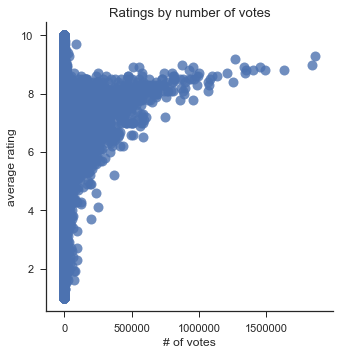

In [38]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of # of votes
sns.lmplot('numVotes', # Horizontal axis
           'averageRating', # Vertical axis
           data=df, # Data source
           fit_reg=False, # do not fix a regression line
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

# Set title
plt.title('Ratings by number of votes')

# Set x-axis label
plt.xlabel('# of votes')

# Set y-axis label
plt.ylabel('average rating')

plt.show()

In [42]:
model = smf.ols(formula='averageRating ~ numVotes', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     958.4
Date:                Wed, 06 Dec 2017   Prob (F-statistic):          7.18e-210
Time:                        16:05:44   Log-Likelihood:            -3.0303e+05
No. Observations:              179649   AIC:                         6.061e+05
Df Residuals:                  179647   BIC:                         6.061e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2675      0.003   2018.168      0.0

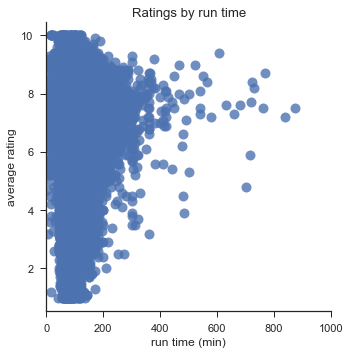

In [39]:
# Create scatterplot of run time
sns.lmplot('runtimeMinutes', # Horizontal axis
           'averageRating', # Vertical axis
           data=df, # Data source
           fit_reg=False, # do not fix a regression line
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

# Set title
plt.title('Ratings by run time')

# Set x-axis label
plt.xlabel('run time (min)')
plt.xlim(left=0, right=1000)

# Set y-axis label
plt.ylabel('average rating')

plt.show()

In [43]:
model = smf.ols(formula='averageRating ~ runtimeMinutes', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     133.0
Date:                Wed, 06 Dec 2017   Prob (F-statistic):           9.05e-31
Time:                        16:06:25   Log-Likelihood:            -3.0345e+05
No. Observations:              179649   AIC:                         6.069e+05
Df Residuals:                  179647   BIC:                         6.069e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.2107      0.007    932.

In [45]:
model = smf.ols(formula='numVotes ~ runtimeMinutes', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               numVotes   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     513.0
Date:                Wed, 06 Dec 2017   Prob (F-statistic):          2.06e-113
Time:                        16:08:08   Log-Likelihood:            -2.1093e+06
No. Observations:              179649   AIC:                         4.219e+06
Df Residuals:                  179647   BIC:                         4.219e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        494.0591    154.557      3.

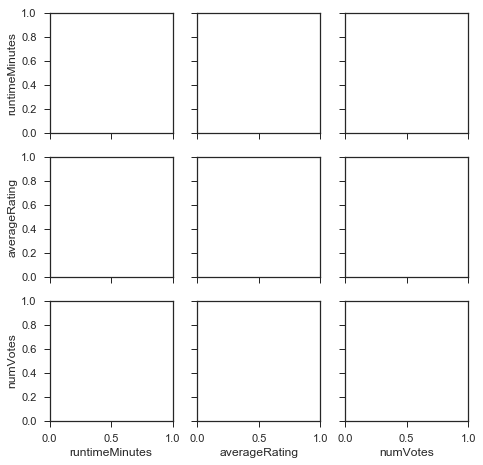

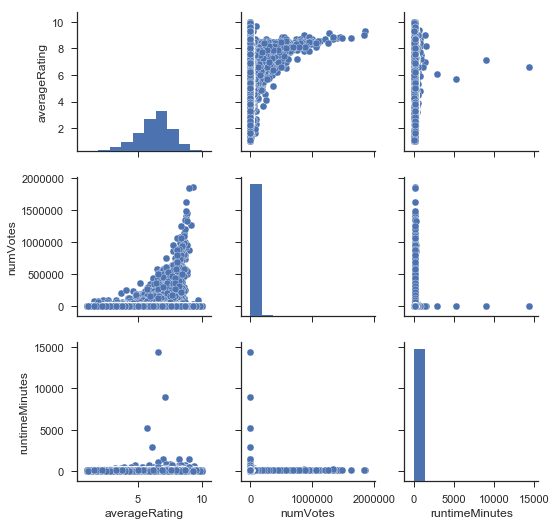

In [51]:
sns.pairplot(df, vars=['averageRating', 'numVotes', 'runtimeMinutes'])
plt.show()